# EDA Dataset 2

In [1]:
import sys
from pathlib import Path
import os

root = Path.cwd()
while root != root.parent and not (root / "pyproject.toml").exists():
    root = root.parent

sys.path.insert(0, str(root))
sys.path.insert(0, str(root / "src"))

os.chdir(root)

In [ ]:
from __future__ import annotations
import numpy as np
import pandas as pd

# reusing the loader to access the data
from data_loader import load_dataset

# paths to dataset 2
TRAIN_X = "data/TrainData2.txt"
TRAIN_Y = "data/TrainLabel2.txt"
TEST_X = "data/TestData2.txt"

# the missing value given in the assignment
MISSING_VALUE = 1.0e99

## Loading the Dataset

In [4]:
x_train, y_train, x_test = load_dataset(TRAIN_X, TRAIN_Y, TEST_X)
x_train.shape, y_train.shape, x_test.shape

((100, 9182), (100,), (74, 9182))

### Label distribution

1     10
2      8
3     12
4     11
5     11
6     10
7      6
8      9
9      6
10     9
11     8
Name: count, dtype: int64


<Axes: >

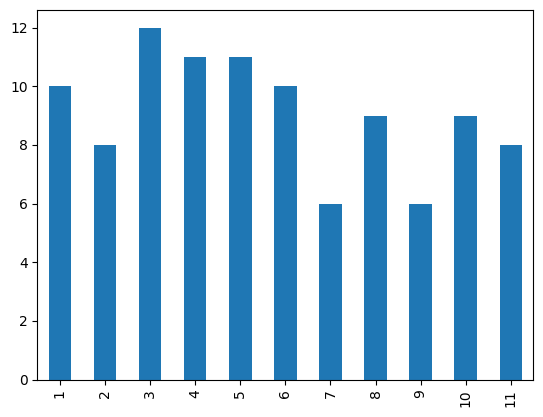

In [5]:
import pandas as pd
dfy2 = pd.Series(y_train)
print(dfy2.value_counts().sort_index())
dfy2.value_counts().sort_index().plot(kind="bar")

### Variance Check

In [6]:
dfx2 = pd.DataFrame(x_train, columns=[f"f{i+1}" for i in range(x_train.shape[1])])
variances2 = dfx2.var()
print("Zero-variance features:", (variances2==0).sum())
print(variances2.sort_values().head(10))

Zero-variance features: 0
f3066    0.007573
f6366    0.007714
f1796    0.007946
f915     0.008443
f7252    0.008539
f3729    0.008760
f6610    0.008881
f294     0.008888
f3990    0.009012
f8970    0.009055
dtype: float64


## PCA Explaining Variance of Dataset

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler2 = StandardScaler()
x_scaled = scaler2.fit_transform(
    pd.DataFrame(x_train).fillna(pd.DataFrame(x_train).mean())
)

pca2 = PCA(n_components=20)  # preview top 20
pca2.fit(x_scaled)

explained = pca2.explained_variance_ratio_
print("Explained variance (first 10 PCs):", np.round(explained[:10], 4))
print("Cumulative variance (10 PCs):", np.round(explained[:10].sum(), 4))
print("Cumulative variance (20 PCs):", np.round(explained.sum(), 4))

Explained variance (first 10 PCs): [0.1432 0.0723 0.0488 0.0433 0.0373 0.0332 0.0305 0.024  0.0226 0.0194]
Cumulative variance (10 PCs): 0.4744
Cumulative variance (20 PCs): 0.607


### PCA Visualization

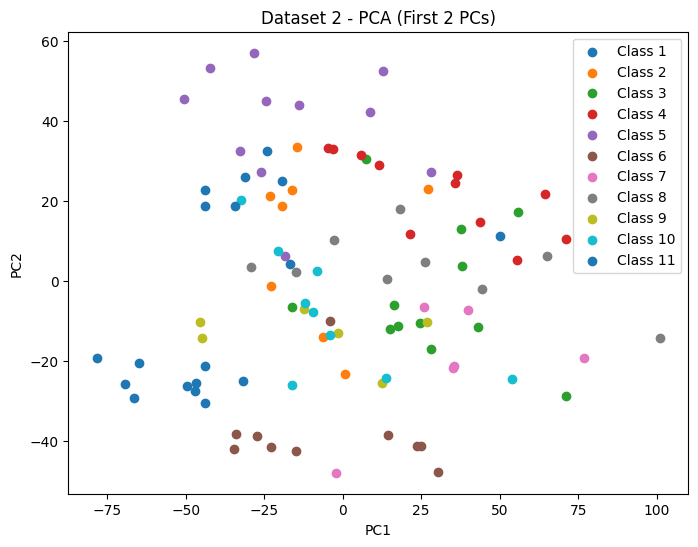

In [9]:
import matplotlib.pyplot as plt
X_pca2 = pca2.transform(x_scaled)[:, :2]

plt.figure(figsize=(8,6))
for c in np.unique(y_train):
    mask = (y_train == c)
    plt.scatter(X_pca2[mask, 0], X_pca2[mask, 1], label=f"Class {c}")
plt.legend()
plt.title("Dataset 2 - PCA (First 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()